In [1]:
import scipy
import scipy.integrate as integrate
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np
import sys
from sympy import *
sys.path.append("../")
from pyACC.calculus import *
from pyACC.cosmology import *

# For a fixed cosmological model create a linear interpolator

In [2]:
#linear interpolator
z_f = 1
n = 1000 #number of bins. In the future is better to increase it
redshift = np.linspace(0,z_f,n)
Dc_t = [Dc(z) for z in redshift]
Dc_i = interp1d(redshift,Dc_t) 

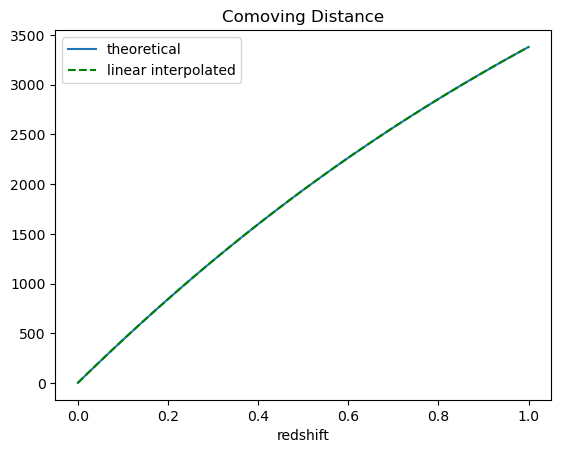

In [3]:
z_n = np.linspace(0,1,100)
Dc_t_n = [Dc(z) for z in z_n]
plt.plot(z_n,Dc_t_n)
plt.plot(z_n,Dc_i(z_n),'--g')
plt.xlabel('redshift')
plt.title('Comoving Distance')
plt.legend(['theoretical', 'linear interpolated'])

# Compute residuals and compare with the theoretical error

Text(0.5, 1.0, 'Residuals with linear interpolation')

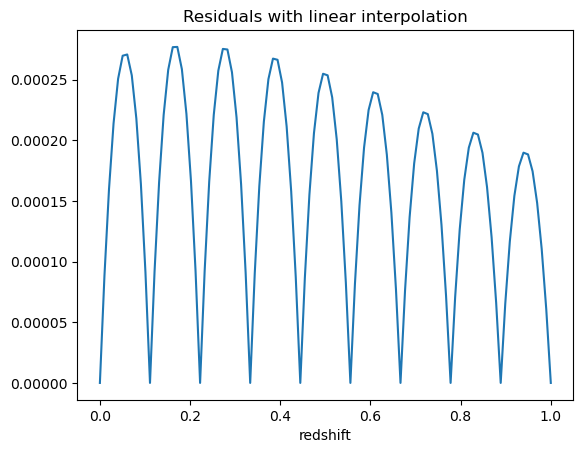

In [4]:
#residual 
'''
x_err = np.linspace(0,1,100)
temp_t = [Dc(z) for z in x_err]
deltad = np.abs(Dc_i(x_err) - temp_t)
'''
deltad = Dc_t_n - Dc_i(z_n)
plt.plot(z_n,deltad)
plt.xlabel('redshift')
plt.title('Residuals with linear interpolation')

Text(0.5, 1.0, 'theoretical error')

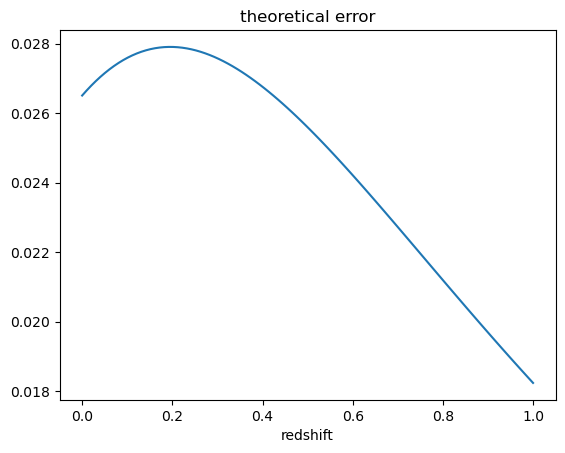

In [5]:
#theoretical error

H0 = 67.7
omegam = 0.319
c = 3e5 #km/s

z = symbols('z')
f = c/ ( H0*sqrt( omegam*(1+z)**3  + (1-omegam)))
f_2 = diff(f,z)
temp = lambdify(z,f_2)
n = z_n.size
h = ((z_n[n-1]-z_n[0])/n)**2/8
err_t = h * np.abs(temp(z_n))

plt.plot(z_n,err_t)
plt.xlabel('redshift')
plt.title('theoretical error')

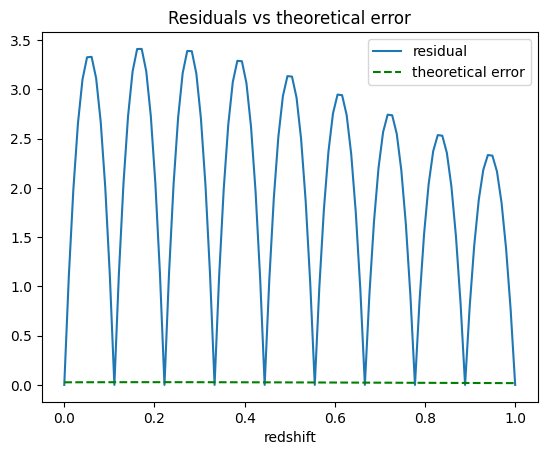

In [27]:
plt.plot(x_err,deltad)
plt.plot(x_err,err_t,'--g')
plt.xlabel('redshift')
plt.title('Residuals vs theoretical error')
plt.legend(['residual', 'theoretical error'])

# change the number of sampling points

In [10]:
x = np.linspace(0,z_f,100)
y = [Dc(z) for z in x]
temp = lambda z : Dc(z)
Dc_i = interp1d(x,y)

Text(0.5, 1.0, 'Residuals with linear interpolation')

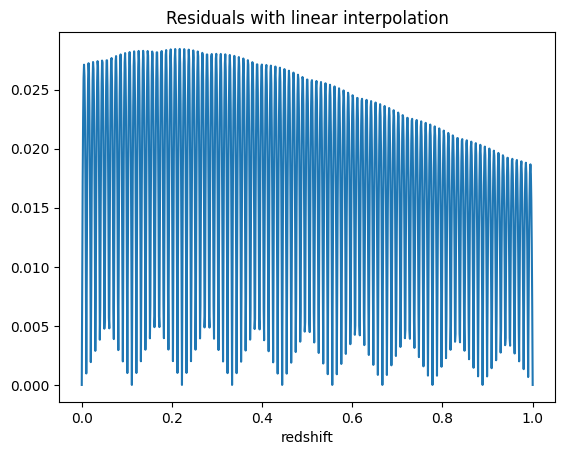

In [11]:
x_err = np.linspace(0,1,1000)
temp_t = [Dc(z) for z in x_err]
deltad = np.abs(Dc_i(x_err) - temp_t)
plt.plot(x_err,deltad)
plt.xlabel('redshift')
plt.title('Residuals with linear interpolation')

x_err is the redshift range where I compare the interpolate function with the theoretical one

If the number of sampling points increases I can increase the steps of x_err. So the residual decreases and I obtain a better approximation with the interpolation 

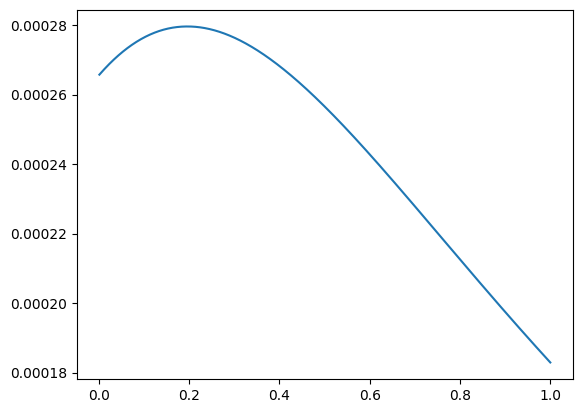

In [12]:
err_t = []
n = x_err.size
for i in range (0,n-1):
    x_temp = np.arange(x_err[i],x_err[i+1],0.001)
    temp = [Dc_der(z) for z in x_temp]
    max = np.max(np.abs(temp))
    err_t = np.append(err_t, max*(x_err[i+1]-x_err[i])**2/8)

plt.plot(x_err[1:],err_t)

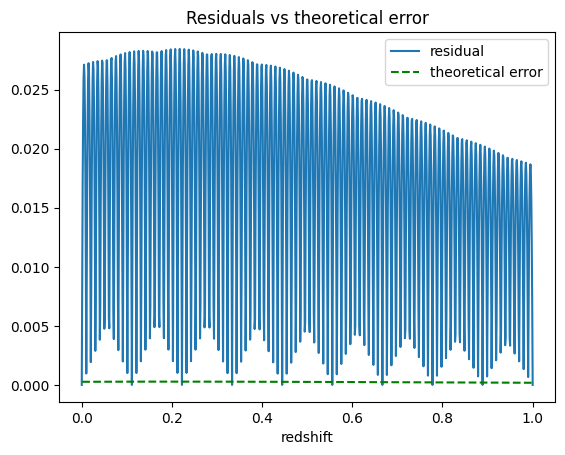

In [13]:
plt.plot(x_err,deltad)
plt.plot(x_err[1:],err_t,'--g')
plt.xlabel('redshift')
plt.title('Residuals vs theoretical error')
plt.legend(['residual', 'theoretical error'])

# change interpolation method

In [14]:
x = np.linspace(0,z_f,100)
y = [Dc(z) for z in x]
Dc_i = CubicSpline(x,y)

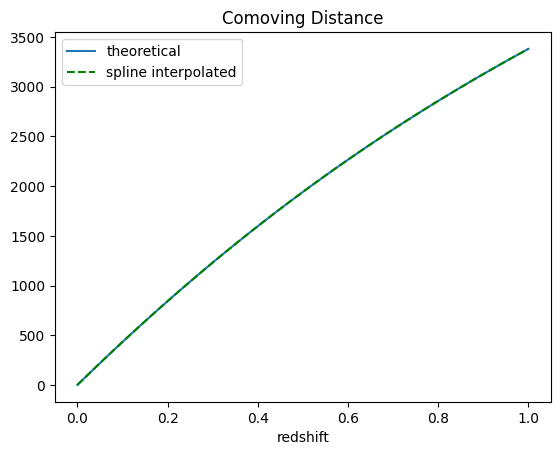

In [15]:
plt.plot(redshift,Dc_t)
plt.plot(x,Dc_i(x),'--g')
plt.xlabel('redshift')
plt.title('Comoving Distance')
plt.legend(['theoretical', 'spline interpolated'])

Text(0.5, 1.0, 'Residuals with spline interpolation')

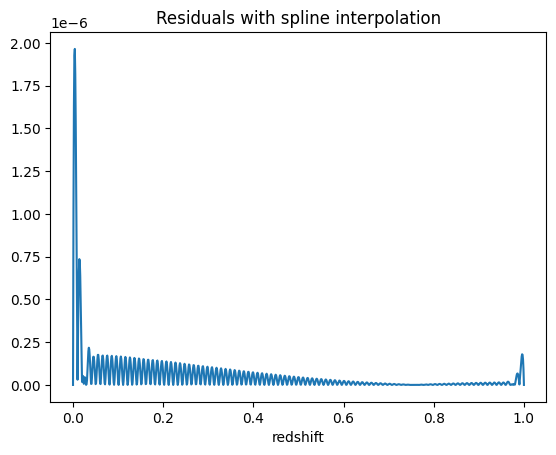

In [16]:
x_err = np.linspace(0,1,1000)
temp_t = [Dc(z) for z in x_err]
deltad = np.abs(Dc_i(x_err) - temp_t)
plt.plot(x_err,deltad)
plt.xlabel('redshift')
plt.title('Residuals with spline interpolation')

The residual is highly decreased: spline interpolation is better than linear interpolation for the comoving distance